<a href="https://colab.research.google.com/github/hamsterler/DataAnalyst_Capstone/blob/main/KPMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file = pd.ExcelFile("KPMG.xlsx")

In [ ]:
transaction = pd.read_excel(file, "Transactions")
new_customer = pd.read_excel(file, "NewCustomerList")
customer_address = pd.read_excel(file, "CustomerAddress")
customer_demo = pd.read_excel(file, "CustomerDemographic")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})



# **Looking for NULL values**

In [ ]:
print(transaction.shape)
transaction.isnull().sum()

(20000, 16)


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
product_age                  0
recency                      0
profit                       0
dtype: int64

In [ ]:
print(customer_address.shape)
customer_address.isnull().sum()

(3999, 6)


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [ ]:
print(new_customer.shape)
new_customer.isnull().sum()

(1000, 23)


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [ ]:
print(customer_demo.shape)
customer_demo.isnull().sum()

(4000, 11)


customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
age                                      1
dtype: int64

In [ ]:
customer = pd.DataFrame()
approved_transaction = transaction[transaction["order_status"] == "Approved"]    # use only approved status transaction
print(len(approved_transaction))
approved_transaction = approved_transaction.dropna(subset = ['standard_cost'])
print(len(approved_transaction))

#Groupy Tansactin Data by Customer ID
customer["profit"] =  approved_transaction.groupby("customer_id").list_price.sum() - approved_transaction.groupby("customer_id").standard_cost.sum()
customer['avg_profit'] = approved_transaction.groupby("customer_id").list_price.mean() - approved_transaction.groupby("customer_id").standard_cost.mean()
customer["recency"] = approved_transaction.groupby("customer_id").recency.min()
customer['frequency'] = approved_transaction.customer_id.value_counts()
customer['avg_bill_price'] = approved_transaction.groupby("customer_id").list_price.mean()
customer['total_price_purchased'] = approved_transaction.groupby("customer_id").list_price.sum()
#customer.set_index("customer_id")
customer

19821
19625


,profit,avg_profit,recency,frequency,avg_bill_price,total_price_purchased
customer_id,,,,,,
1,3018.090000,274.371818,13,11,825.859091,9084.45
2,2226.260000,742.086667,134,3,1383.023333,4149.07
3,3362.810000,420.351250,108,8,1236.028750,9888.23
4,220.570000,110.285000,201,2,523.860000,1047.72
5,2394.940000,399.156667,22,6,983.866667,5903.20
...,...,...,...,...,...,...
3497,1648.320000,549.440000,58,3,1248.023333,3744.07
3498,3147.330000,524.555000,133,6,862.843333,5177.06
3499,4955.250000,707.892857,57,7,1096.211429,7673.48


In [ ]:
print("Total income: ", round(approved_transaction.list_price.sum(), 2))
print("Total standard cost: ", round(approved_transaction.standard_cost.sum(), 2))
total_profit = round(approved_transaction.list_price.sum() - approved_transaction.standard_cost.sum(), 2)
print("Total profit: ", total_profit, " (", round(total_profit / approved_transaction.list_price.sum() * 100, 2), " %)")


Total income:  21739495.29
Total standard cost:  10907991.26
Total profit:  10831504.03  ( 49.82  %)


wealth_segment
Affluent Customer    1112.530292
High Net Worth       1101.876753
Mass Customer        1108.598100
Name: list_price, dtype: float64


[Text(0.5, 1.0, 'High Net Worth')]

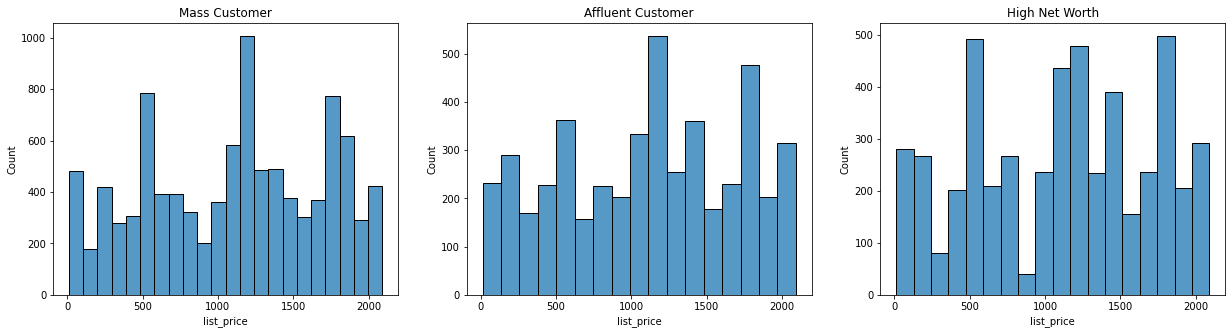

In [ ]:
wealths = cleaned_transaction.wealth_segment.unique()
approved_transaction.groupby("product_id").head()
cleaned_transaction = approved_transaction.merge(customer_demo, how = 'left', left_on='customer_id', right_on='customer_id')

cleaned_transaction = cleaned_transaction.sort_values(by = 'transaction_id').set_index("transaction_id")
print(cleaned_transaction.groupby('wealth_segment').list_price.mean())

fig, axs = plt.subplots(ncols=3, figsize=(21, 5))
sns.histplot(cleaned_transaction.loc[cleaned_transaction.wealth_segment == wealths[0]].list_price , ax = axs[0]).set(title = wealths[0])
sns.histplot(cleaned_transaction.loc[cleaned_transaction.wealth_segment == wealths[1]].list_price , ax = axs[1]).set(title = wealths[1])
sns.histplot(cleaned_transaction.loc[cleaned_transaction.wealth_segment == wealths[2]].list_price , ax = axs[2]).set(title = wealths[2])

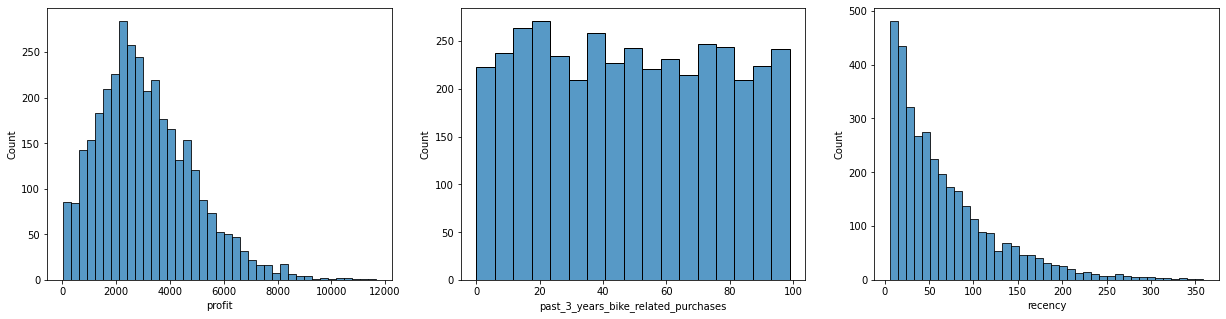

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(21, 5))
sns.histplot(customer["profit"], ax = axs[0])
sns.histplot(customer_demo["past_3_years_bike_related_purchases"], ax = axs[1])
sns.histplot(customer["recency"], ax = axs[2])

# **Merging Customer_Demographic with Transaction(Grouped by Customer ID) and Customer Address**

In [ ]:
data = pd.DataFrame(customer_demo, columns = {"customer_id", "gender", "age", "owns_car", "past_3_years_bike_related_purchases", "job_title", "wealth_segment"})
data.set_index("customer_id")
#join data
merged_data = data.merge(customer, how = 'right', left_on = "customer_id", right_on = "customer_id")
merged_data = merged_data.merge(customer_address, how = 'left', left_on = 'customer_id', right_on = 'customer_id')
merged_data  = merged_data.set_index("customer_id")
merged_data = merged_data.drop(columns = ['country', 'address', 'postcode', 'job_title'])  #drop columns

#drop all row that has NULL
merged_data  = merged_data.dropna()

#cleaning age >= 100
merged_data = merged_data.loc[merged_data['age'] < 100,:]

In [ ]:
#fill null values
merged_data.gender = merged_data.gender.fillna("U")
merged_data.owns_car = merged_data.owns_car.fillna("N/A")
merged_data.gender = merged_data.gender.fillna("U")

merged_data = merged_data.fillna(value = {'past_3_years_bike_related_purchases': int(-1), 'age': int(-1), 'gender': "U", 'property_valuation': int(-1), 'job_title': 'N/A', 'state': 'N/A'})
merged_data['profit'] = merged_data['profit'].round(2)
merged_data = merged_data.astype({'past_3_years_bike_related_purchases' : 'int64', 'age': 'int64'} )
merged_data

,age,owns_car,past_3_years_bike_related_purchases,gender,wealth_segment,profit,avg_profit,recency,frequency,avg_bill_price,state,property_valuation
customer_id,,,,,,,,,,,,
1,68,Yes,93,F,Mass Customer,3018.09,274.371818,13,11,825.859091,NSW,10.0
2,41,Yes,81,M,Mass Customer,2226.26,742.086667,134,3,1383.023333,NSW,10.0
4,60,No,33,M,Mass Customer,220.57,110.285000,201,2,523.860000,QLD,9.0
5,45,Yes,56,F,Affluent Customer,2394.94,399.156667,22,6,983.866667,NSW,4.0
6,55,Yes,35,M,High Net Worth,3946.55,789.310000,70,5,1186.338000,VIC,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3496,36,Yes,99,M,Mass Customer,2045.84,511.460000,262,4,1181.345000,NSW,9.0
3497,36,Yes,73,F,Affluent Customer,1648.32,549.440000,58,3,1248.023333,VIC,5.0
3498,26,No,28,F,Mass Customer,3147.33,524.555000,133,6,862.843333,VIC,4.0


In [ ]:
print("Max Frequency: ", merged_data.frequency.max())
print("Min Frequency: ", merged_data.frequency.min())

Max Frequency:  14
Min Frequency:  1


In [ ]:
merged_data.to_csv("data.csv")

# **Categorize data with Range of values**

In [ ]:
merged_data['age_range'] = pd.cut(merged_data.age, bins = [0,20,40,60,80,100], labels = [1,2,3,4,5])

In [ ]:
merged_data

,age,owns_car,past_3_years_bike_related_purchases,gender,wealth_segment,profit,avg_profit,recency,frequency,avg_bill_price,state,property_valuation,age_range
customer_id,,,,,,,,,,,,,
1,68,Yes,93,F,Mass Customer,3018.09,274.371818,13,11,825.859091,NSW,10.0,4
2,41,Yes,81,M,Mass Customer,2226.26,742.086667,134,3,1383.023333,NSW,10.0,3
4,60,No,33,M,Mass Customer,220.57,110.285000,201,2,523.860000,QLD,9.0,3
5,45,Yes,56,F,Affluent Customer,2394.94,399.156667,22,6,983.866667,NSW,4.0,3
6,55,Yes,35,M,High Net Worth,3946.55,789.310000,70,5,1186.338000,VIC,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,36,Yes,99,M,Mass Customer,2045.84,511.460000,262,4,1181.345000,NSW,9.0,2
3497,36,Yes,73,F,Affluent Customer,1648.32,549.440000,58,3,1248.023333,VIC,5.0,2
3498,26,No,28,F,Mass Customer,3147.33,524.555000,133,6,862.843333,VIC,4.0,2


In [ ]:
print("Max Purchased: ", merged_data['past_3_years_bike_related_purchases'].max())
print("Min Purchased: ", merged_data['past_3_years_bike_related_purchases'].min())

merged_data['purchases_range'] = pd.cut(merged_data['past_3_years_bike_related_purchases'], bins = [0,20,40,60,80,100], labels = [1,2,3,4,5])

Max Purchased:  99
Min Purchased:  0


In [ ]:
merged_data

,age,owns_car,past_3_years_bike_related_purchases,gender,wealth_segment,profit,avg_profit,recency,frequency,avg_bill_price,state,property_valuation,age_range,purchases_range
customer_id,,,,,,,,,,,,,,
1,68,Yes,93,F,Mass Customer,3018.09,274.371818,13,11,825.859091,NSW,10.0,4,5
2,41,Yes,81,M,Mass Customer,2226.26,742.086667,134,3,1383.023333,NSW,10.0,3,5
4,60,No,33,M,Mass Customer,220.57,110.285000,201,2,523.860000,QLD,9.0,3,2
5,45,Yes,56,F,Affluent Customer,2394.94,399.156667,22,6,983.866667,NSW,4.0,3,3
6,55,Yes,35,M,High Net Worth,3946.55,789.310000,70,5,1186.338000,VIC,9.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,36,Yes,99,M,Mass Customer,2045.84,511.460000,262,4,1181.345000,NSW,9.0,2,5
3497,36,Yes,73,F,Affluent Customer,1648.32,549.440000,58,3,1248.023333,VIC,5.0,2,4
3498,26,No,28,F,Mass Customer,3147.33,524.555000,133,6,862.843333,VIC,4.0,2,2


In [ ]:
print("Max Profit: ", merged_data.profit.max())
print("Min Profit: ", merged_data.profit.min())

merged_data['profit'] = merged_data['profit'].astype(int)
merged_data['profit_range'] = pd.cut(merged_data.profit, bins = [0,2000,4000,6000,8000,10000,12000], labels = [1,2,3,4,5,6])

Max Profit:  11668.95
Min Profit:  15.08


In [ ]:
print("Max recency:", merged_data['recency'].max())
print("Min recency:", merged_data['recency'].min())
merged_data['recency_range'] = pd.cut(merged_data.recency, bins = [0,60,120,180,240,300,360], labels = [1,2,3,4,5,6])
merged_data

Max recency: 359
Min recency: 6


,age,owns_car,past_3_years_bike_related_purchases,gender,wealth_segment,profit,avg_profit,recency,frequency,avg_bill_price,state,property_valuation,age_range,purchases_range,profit_range,recency_range
customer_id,,,,,,,,,,,,,,,,
1,68,Yes,93,F,Mass Customer,3018,274.371818,13,11,825.859091,NSW,10.0,4,5,2,1
2,41,Yes,81,M,Mass Customer,2226,742.086667,134,3,1383.023333,NSW,10.0,3,5,2,3
4,60,No,33,M,Mass Customer,220,110.285000,201,2,523.860000,QLD,9.0,3,2,1,4
5,45,Yes,56,F,Affluent Customer,2394,399.156667,22,6,983.866667,NSW,4.0,3,3,2,1
6,55,Yes,35,M,High Net Worth,3946,789.310000,70,5,1186.338000,VIC,9.0,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,36,Yes,99,M,Mass Customer,2045,511.460000,262,4,1181.345000,NSW,9.0,2,5,2,5
3497,36,Yes,73,F,Affluent Customer,1648,549.440000,58,3,1248.023333,VIC,5.0,2,4,1,1
3498,26,No,28,F,Mass Customer,3147,524.555000,133,6,862.843333,VIC,4.0,2,2,2,3


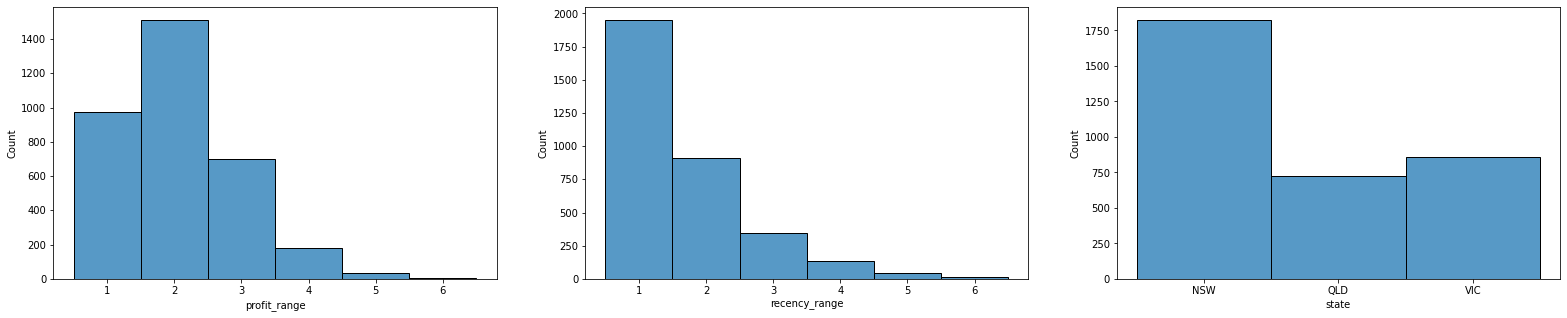

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(27, 5))
sns.histplot(merged_data["profit_range"], ax = axs[0])
sns.histplot(merged_data["recency_range"], ax = axs[1])
sns.histplot(merged_data["state"], ax = axs[2])

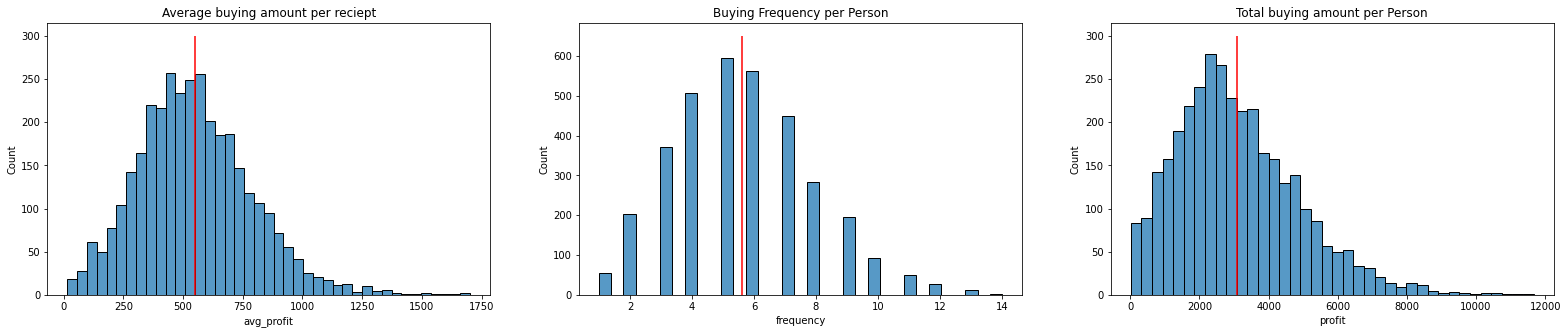

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(27, 5))
sns.histplot(merged_data["avg_profit"], ax = axs[0]).set(title = "Average buying amount per reciept")
axs[0].vlines(merged_data["avg_profit"].mean(), 0, 300, color = "red")

sns.histplot(merged_data["frequency"], ax = axs[1]).set(title = "Buying Frequency per Person")
axs[1].vlines(merged_data["frequency"].mean(), 0, 650, color = "red")

sns.histplot(merged_data["profit"], ax = axs[2]).set(title = "Total buying amount per Person")
axs[2].vlines(merged_data["profit"].mean(), 0, 300, color = "red")

# **Compare each state**

[Text(0.5, 1.0, 'Total Bills from each States')]

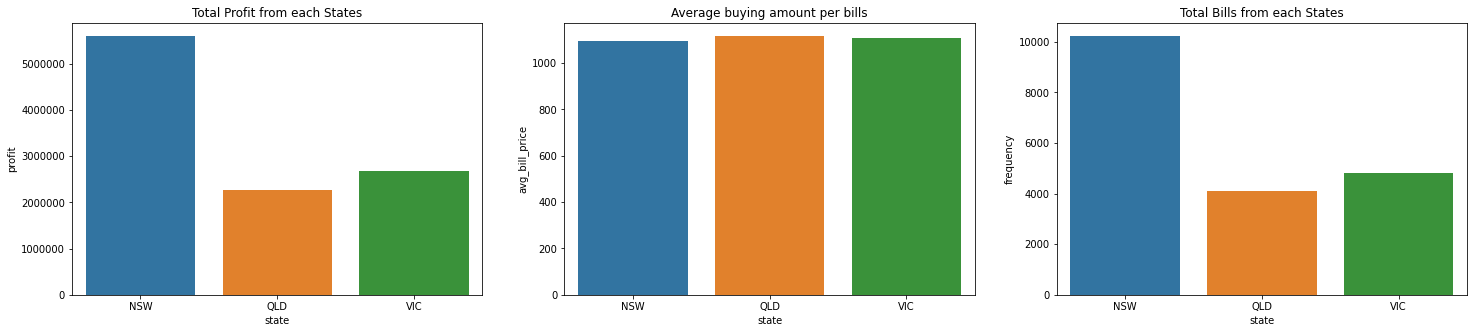

In [ ]:
cus_by_state = pd.DataFrame()
cus_by_state['profit'] = merged_data.groupby("state").profit.sum()
cus_by_state['avg_bill_price'] = merged_data.groupby("state").avg_bill_price.mean()
cus_by_state['frequency'] = merged_data.groupby("state").frequency.sum()

fig, axs = plt.subplots(ncols=3, figsize=(25, 5))
axs[0].ticklabel_format(style='plain')
axs[1].ticklabel_format(style='plain')
sns.barplot(x = "state", y = "profit", data = cus_by_state.reset_index(),ax = axs[0]).set(title = "Total Profit from each States")

sns.barplot(x = "state", y = "avg_bill_price", data = cus_by_state.reset_index(), ax = axs[1]).set(title = "Average buying amount per bills")

sns.barplot(x = "state", y = "frequency", data = cus_by_state.reset_index(), ax = axs[2]).set(title = "Total Bills from each States")

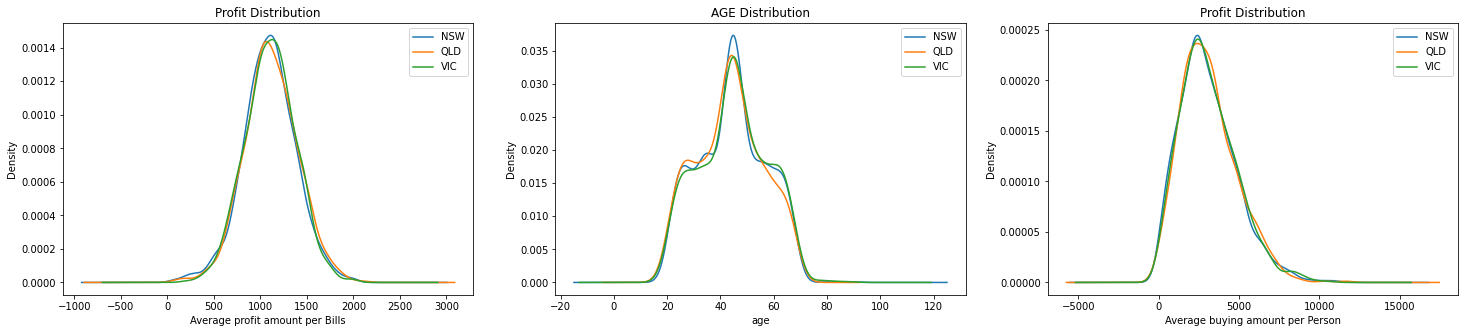

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(25, 5))
merged_data.avg_bill_price[merged_data.state == "NSW"].plot(kind='kde', ax = axs[0])    
merged_data.avg_bill_price[merged_data.state == "QLD"].plot(kind='kde', ax = axs[0])
merged_data.avg_bill_price[merged_data.state == "VIC"].plot(kind='kde', ax = axs[0])
 # plots an axis lable
axs[0].set(xlabel = "Average profit amount per Bills")    
axs[0].set(title = "Profit Distribution")
# sets our legend for our graph.
axs[0].legend(('NSW', 'QLD','VIC',),loc='best')

merged_data.age[merged_data.state == "NSW"].plot(kind='kde', ax = axs[1])    
merged_data.age[merged_data.state == "QLD"].plot(kind='kde', ax = axs[1])
merged_data.age[merged_data.state == "VIC"].plot(kind='kde', ax = axs[1])
 # plots an axis lable
axs[1].set(xlabel = "age")    
axs[1].set(title = "AGE Distribution")
# sets our legend for our graph.
axs[1].legend(('NSW', 'QLD','VIC',),loc='best')

merged_data.profit[merged_data.state == "NSW"].plot(kind='kde', ax = axs[2])    
merged_data.profit[merged_data.state == "QLD"].plot(kind='kde', ax = axs[2])
merged_data.profit[merged_data.state == "VIC"].plot(kind='kde', ax = axs[2])
 # plots an axis lable
axs[2].set(xlabel = "Average buying amount per Person")    
axs[2].set(title = "Profit Distribution")
# sets our legend for our graph.
axs[2].legend(('NSW', 'QLD','VIC',),loc='best')

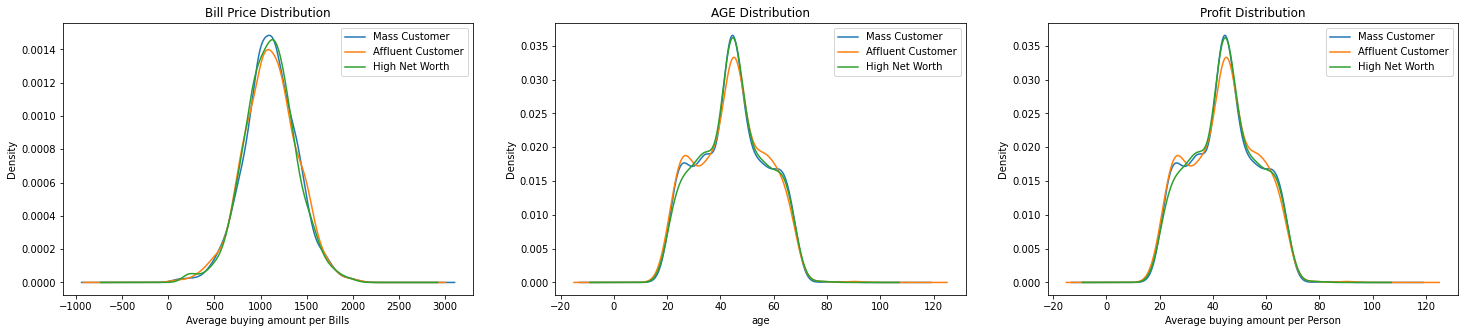

In [ ]:
wealth_list = merged_data.wealth_segment.unique()
fig, axs = plt.subplots(ncols=3, figsize=(25, 5))
merged_data.avg_bill_price[merged_data.wealth_segment == wealth_list[0]].plot(kind='kde', ax = axs[0])    
merged_data.avg_bill_price[merged_data.wealth_segment == wealth_list[1]].plot(kind='kde', ax = axs[0])
merged_data.avg_bill_price[merged_data.wealth_segment == wealth_list[2]].plot(kind='kde', ax = axs[0])
 # plots an axis lable
axs[0].set(xlabel = "Average buying amount per Bills")    
axs[0].set(title = "Bill Price Distribution")
# sets our legend for our graph.
axs[0].legend((wealth_list),loc='best')

merged_data.age[merged_data.wealth_segment == wealth_list[0]].plot(kind='kde', ax = axs[1])    
merged_data.age[merged_data.wealth_segment == wealth_list[1]].plot(kind='kde', ax = axs[1])
merged_data.age[merged_data.wealth_segment == wealth_list[2]].plot(kind='kde', ax = axs[1])
 # plots an axis lable
axs[1].set(xlabel = "age")    
axs[1].set(title = "AGE Distribution")
# sets our legend for our graph.
axs[1].legend((wealth_list),loc='best')

merged_data.age[merged_data.wealth_segment == wealth_list[0]].plot(kind='kde', ax = axs[2])    
merged_data.age[merged_data.wealth_segment == wealth_list[1]].plot(kind='kde', ax = axs[2])
merged_data.age[merged_data.wealth_segment == wealth_list[2]].plot(kind='kde', ax = axs[2])
 # plots an axis lable
axs[2].set(xlabel = "Average buying amount per Person")    
axs[2].set(title = "Profit Distribution")
# sets our legend for our graph.
axs[2].legend((wealth_list),loc='best')

### From this 3 Graph above display **no different** of buying behavior between each state

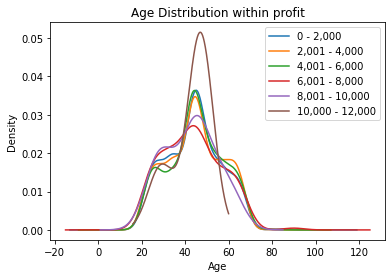

In [ ]:
merged_data.age[merged_data.profit_range == 1].plot(kind='kde')    
merged_data.age[merged_data.profit_range == 2].plot(kind='kde')
merged_data.age[merged_data.profit_range == 3].plot(kind='kde')
merged_data.age[merged_data.profit_range == 4].plot(kind='kde')    
merged_data.age[merged_data.profit_range == 5].plot(kind='kde')
merged_data.age[merged_data.profit_range == 6].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within profit")
# sets our legend for our graph.
plt.legend(('0 - 2,000 ', '2,001 - 4,000 ','4,001 - 6,000', '6,001 - 8,000', '8,001 - 10,000','10,000 - 12,000',),loc='best') 

[Text(0.5, 1.0, 'Age - Avg_Profit')]

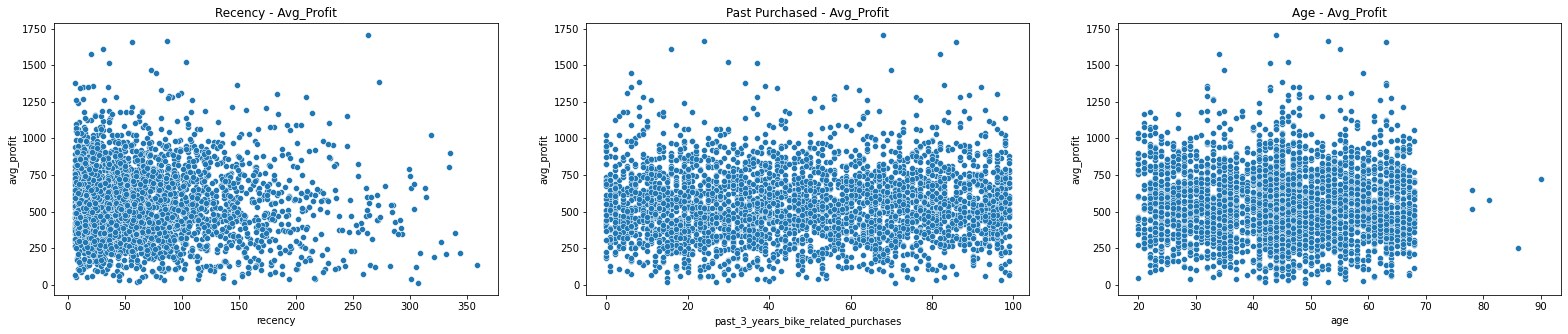

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(27, 5))
sns.scatterplot(x=merged_data['recency'], y=merged_data['avg_profit'], ax = axs[0]).set(title = "Recency - Avg_Profit")
sns.scatterplot(x=merged_data['past_3_years_bike_related_purchases'], y=merged_data['avg_profit'], ax = axs[1]).set(title = "Past Purchased - Avg_Profit")
sns.scatterplot(x=merged_data['age'], y=merged_data['avg_profit'], ax = axs[2]).set(title = "Age - Avg_Profit")

[Text(0.5, 1.0, 'Past-Purchased - Recency')]

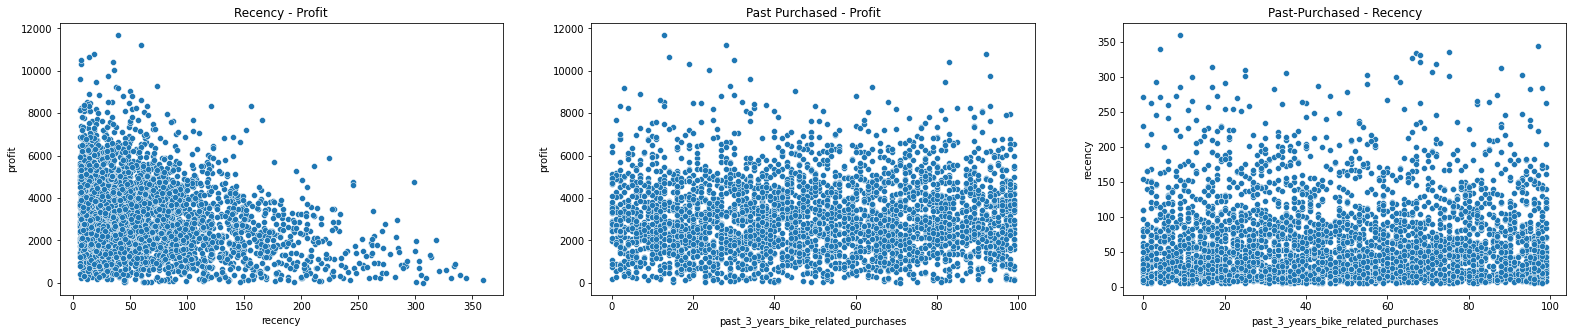

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(27, 5))
sns.scatterplot(x=merged_data['recency'], y=merged_data['profit'], ax = axs[0]).set(title = "Recency - Profit")
sns.scatterplot(x=merged_data['past_3_years_bike_related_purchases'], y=merged_data['profit'], ax = axs[1]).set(title = "Past Purchased - Profit")
sns.scatterplot(x=merged_data['past_3_years_bike_related_purchases'], y=merged_data['recency'], ax = axs[2]).set(title = "Past-Purchased - Recency")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.p

[Text(0.5, 1.0, 'State')]

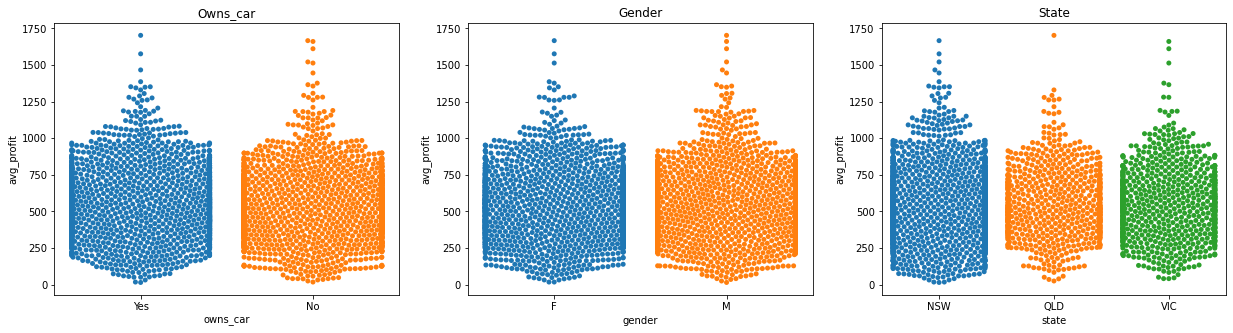

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(21, 5))
sns.swarmplot(x="owns_car", y="avg_profit", data=merged_data, ax = axs[0]).set(title = 'Owns_car')
sns.swarmplot(x="gender", y="avg_profit", data=merged_data, ax = axs[1]).set(title = 'Gender')
sns.swarmplot(x="state", y="avg_profit", data=merged_data, ax = axs[2]).set(title = 'State')

# **Plotting Bar to see how each wealth classification can classify our data**

[Text(0, 0.5, 'Member Count'), Text(0.5, 1.0, 'Number of Members')]

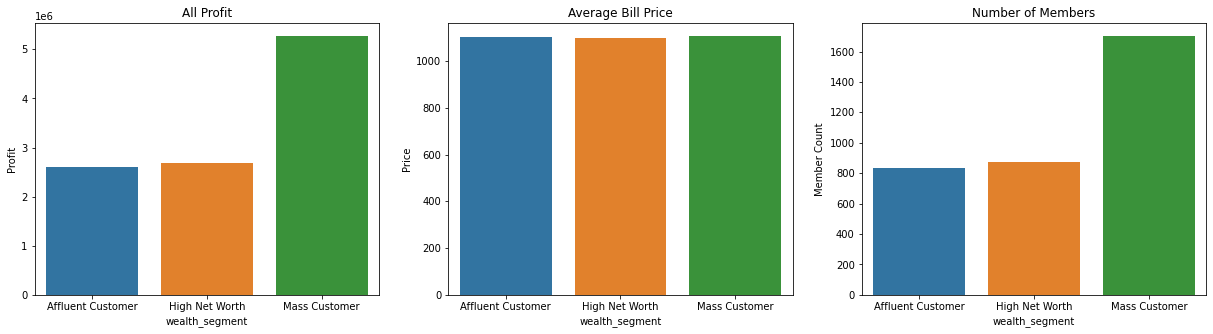

In [ ]:
mean_profit_by_wealth = merged_data.groupby("wealth_segment").profit.mean()
sum_profit_by_wealth = merged_data.groupby("wealth_segment").profit.sum()
no_by_wealth = merged_data.groupby("wealth_segment").profit.count()
avg_bill_price = merged_data.groupby("wealth_segment").avg_bill_price.mean()

fig, axs = plt.subplots(ncols=3, figsize=(21, 5))
sns.barplot(x = 'wealth_segment', y = 'profit', data = sum_profit_by_wealth.reset_index(), ax = axs[0]).set( title = "All Profit", ylabel ="Profit")
sns.barplot(x = 'wealth_segment', y = 'avg_bill_price', data = avg_bill_price.reset_index(), ax = axs[1]).set( title = "Average Bill Price", ylabel ="Price")
sns.barplot(x = 'wealth_segment', y = 'profit', data = no_by_wealth.reset_index(), ax = axs[2]).set( title = "Number of Members", ylabel ="Member Count")


According to the bar chart above, show **no different** between each wealth class in term of average purchasing amount.

In [ ]:
#just an example of using pivot function
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


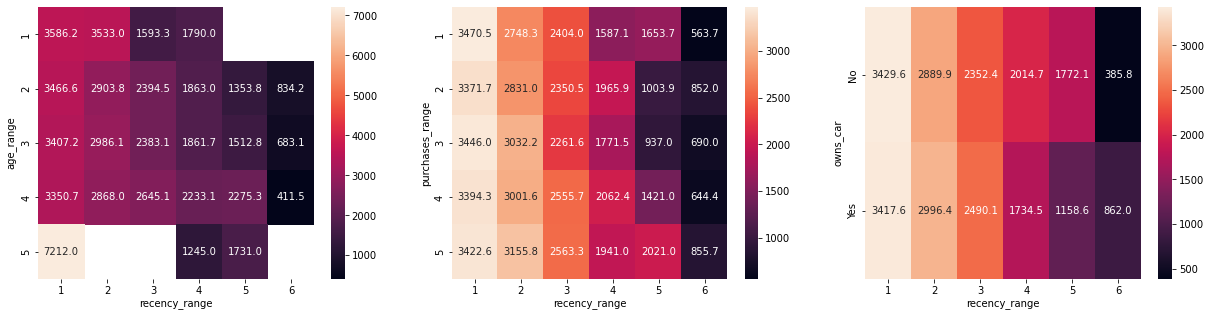

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(21, 5))
#heat1
heat = merged_data.pivot_table(index = "age_range", columns = "recency_range", values = "profit")
sns.heatmap(heat, annot=True, fmt='.1f', ax = axs[0])
#heat2
heat2 = merged_data.pivot_table(index = "purchases_range", columns = "recency_range", values = "profit")
sns.heatmap(heat2, annot=True, fmt='.1f', ax =axs[1])
#heat3
heat3 = merged_data.pivot_table(index = "owns_car", columns = "recency_range", values = "profit")
sns.heatmap(heat3, annot=True, fmt='.1f', ax =axs[2])

             age owns_car  past_3_years_bike_related_purchases gender  \
customer_id                                                             
720           90       No                                   67      M   
3410          81       No                                   93      F   

                wealth_segment  profit  avg_profit  recency  frequency  \
customer_id                                                              
720          Affluent Customer    7212     721.217       26         10   
3410             Mass Customer    1731     577.280      247          3   

             avg_bill_price state  property_valuation age_range  \
customer_id                                                       
720                1300.435   NSW                10.0         5   
3410                988.630   NSW                10.0         5   

            purchases_range profit_range recency_range  
customer_id                                             
720                       4

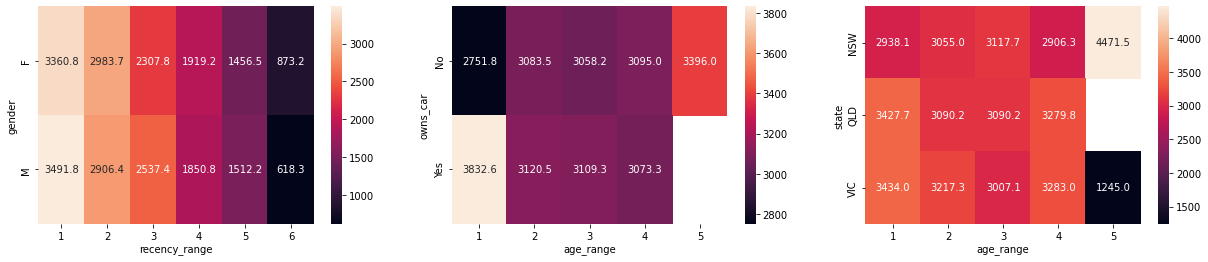

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(21, 4))
#heat4
heat4 = merged_data.pivot_table(index = "gender", columns = "recency_range", values = "profit")
sns.heatmap(heat4, annot=True, fmt='.1f', ax = axs[0])
#heat5
heat5 = merged_data.pivot_table(index = "owns_car", columns = "age_range", values = "profit")
sns.heatmap(heat5, annot=True, fmt='.1f',ax = axs[1])
#heat6
heat6 = merged_data.pivot_table(index = "state", columns = "age_range", values = "profit")
sns.heatmap(heat6, annot=True, fmt='.1f',ax = axs[2])

print(merged_data.loc[np.logical_and(merged_data.state == 'NSW',  merged_data.age_range == 5), :])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



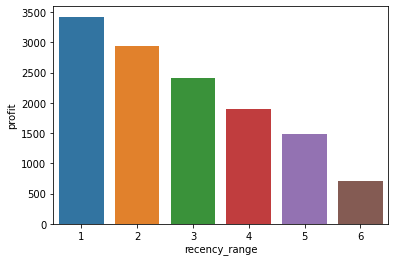

In [ ]:
bar = merged_data.pivot_table(index = "recency_range", values = "profit")
sns.barplot(bar.index, bar.profit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



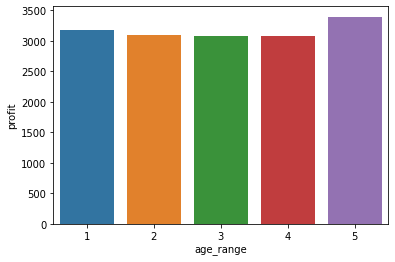

In [ ]:
bar2 = merged_data.pivot_table(index = "age_range", values = "profit")
sns.barplot(bar2.index, bar2.profit)

In [ ]:

x = pd.DataFrame(merged_data, columns = {"gender", "age_range", "owns_car", "purchases_range", "recency_range", "profit"})
x.loc[x.gender == 'U', 'gender'] = 0
x.loc[x.gender == 'M', 'gender'] = 1
x.loc[x.gender == 'F', 'gender'] = 2
x.owns_car = x.owns_car.fillna("N/A")
x.loc[x.owns_car == 'N/A', 'owns_car'] = 0
x.loc[x.owns_car == 'Yes', 'owns_car'] = 1
x.loc[x.owns_car == 'No', 'owns_car'] = 2
#cluster_data.set_index("customer_id")
x


,age_range,purchases_range,owns_car,recency_range,gender,profit
customer_id,,,,,,
1,4,5,1,1,2,3018
2,3,5,1,3,1,2226
4,3,2,2,4,1,220
5,3,3,1,1,2,2394
6,3,2,1,2,1,3946
...,...,...,...,...,...,...
3496,2,5,1,5,1,2045
3497,2,4,1,1,2,1648
3498,2,2,2,3,2,3147


In [ ]:
x = pd.DataFrame(merged_data, columns = {"recency", "past_3_years_bike_related_purchases", "profit"})

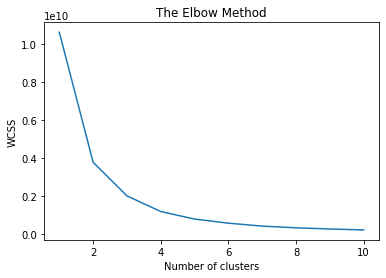

In [ ]:
from sklearn.cluster import KMeans
X = x.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 3 0 ... 3 1 0]


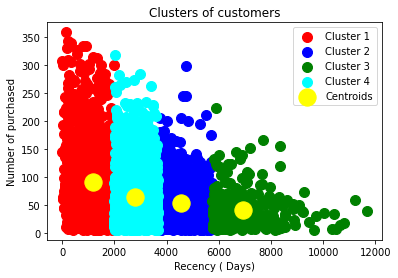

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Recency ( Days)')
plt.ylabel('Number of purchased')
plt.legend()
plt.show()

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = ' <---- Recency'),yaxis = dict(title  = 'Profit ----> '),zaxis = dict(title  = ' <---- Past Purchased'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()